In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_excel(r"c:/Users/hp/Downloads/pypy/online_retail_II.xlsx")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


DATA EXPLORATION

In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [8]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [23]:
df["Customer ID"].head(10)

0    13085.0
1    13085.0
2    13085.0
3    13085.0
4    13085.0
5    13085.0
6    13085.0
7    13085.0
8    13085.0
9    13085.0
Name: Customer ID, dtype: float64

In [13]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [24]:
df["Invoice"]=df["Invoice"]=df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [6]:
df["Invoice"]=df["Invoice"]=df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [14]:
df["Invoice"]=df["Invoice"]=df["Invoice"].astype("str")
df["Invoice"].str.match("[0-9]"," ",).unique()


array([ True, False])

In [17]:
df[df["Invoice"].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [18]:
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [19]:
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [41]:
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.contains("AD")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.460,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.340,14911.0,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.560,12745.0,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.820,14911.0,EIRE
...,...,...,...,...,...,...,...,...
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.470,17364.0,United Kingdom
249674,513565,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,72.450,16422.0,United Kingdom
341826,522766,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-09-16 13:58:00,0.001,15182.0,United Kingdom
440930,531433,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-11-08 11:54:00,0.001,13317.0,United Kingdom


In [31]:
df.tail(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525441,538171,22837,HOT WATER BOTTLE BABUSHKA,2,2010-12-09 20:01:00,4.65,17530.0,United Kingdom
525442,538171,85152,HAND OVER THE CHOCOLATE SIGN,3,2010-12-09 20:01:00,2.10,17530.0,United Kingdom
525443,538171,21329,DINOSAURS WRITING SET,2,2010-12-09 20:01:00,1.65,17530.0,United Kingdom
525444,538171,21327,SKULLS WRITING SET,2,2010-12-09 20:01:00,1.65,17530.0,United Kingdom
525445,538171,22666,RECIPE BOX PANTRY YELLOW DESIGN,1,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525446,538171,22154,ANGEL DECORATION 3 BUTTONS,48,2010-12-09 20:01:00,0.42,17530.0,United Kingdom
525447,538171,21875,KINGS CHOICE MUG,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525448,538171,21871,SAVE THE PLANET MUG,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525449,538171,21877,HOME SWEET HOME MUG,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525450,538171,22747,POPPY'S PLAYHOUSE BATHROOM,2,2010-12-09 20:01:00,2.10,17530.0,United Kingdom


In [34]:
df[df["Price"]==0]

3687

DATA CLEANING

In [2]:
df2 = pd.read_excel(r"c:/Users/hp/Downloads/pypy/online_retail_II.xlsx")
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
# Dropping down incorrect INVOICE values.
df2 ["Invoice"] = df2["Invoice"].astype("str")
mask = (df2["Invoice"].str.match("^\\d{6}$") == True)
df2 = df2[mask]
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
#Dropping down incorrect STOCKCODE values.
df2["StockCode"] = df["StockCode"].astype("str")
mask = (
    (df2["StockCode"].str.match("^\\d{5}$") == True) 
    | (df2["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (df2["StockCode"].str.match("^PADS$") == True)
)
df2 =  df2[mask]
df2

C:\Users\hp\AppData\Local\Temp\ipykernel_2388\307993111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["StockCode"] = df["StockCode"].astype("str")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [5]:
# droppind down NULL values
df2.dropna(subset=["Customer ID"], inplace=True)
df2

C:\Users\hp\AppData\Local\Temp\ipykernel_2388\254322407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=["Customer ID"], inplace=True)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [6]:
len(df2)/len(df)

0.7732962103752705

cleaned out 23% of data.

FEATURE ENGINEERING

In [6]:
df2["Salesline"] = df2["Quantity"]*df2["Price"]
df2

C:\Users\hp\AppData\Local\Temp\ipykernel_2388\3579744900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Salesline"] = df2["Quantity"]*df2["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Salesline
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [7]:
# each customer's important context.
aggregated_df =df2.groupby(by="Customer ID", as_index = False).aggregate(   
        MonetaryValue = ("Salesline", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate", "max")
)
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00
4281,18284.0,411.68,1,2010-10-04 11:33:00
4282,18285.0,377.00,1,2010-02-17 10:24:00
4283,18286.0,1246.43,2,2010-08-20 11:57:00


In [8]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
max_invoice_date


Timestamp('2010-12-09 20:01:00')

In [9]:
# the number of days since the last purchase.
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17
4281,18284.0,411.68,1,2010-10-04 11:33:00,66
4282,18285.0,377.00,1,2010-02-17 10:24:00,295
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111


<function matplotlib.pyplot.show(close=None, block=None)>

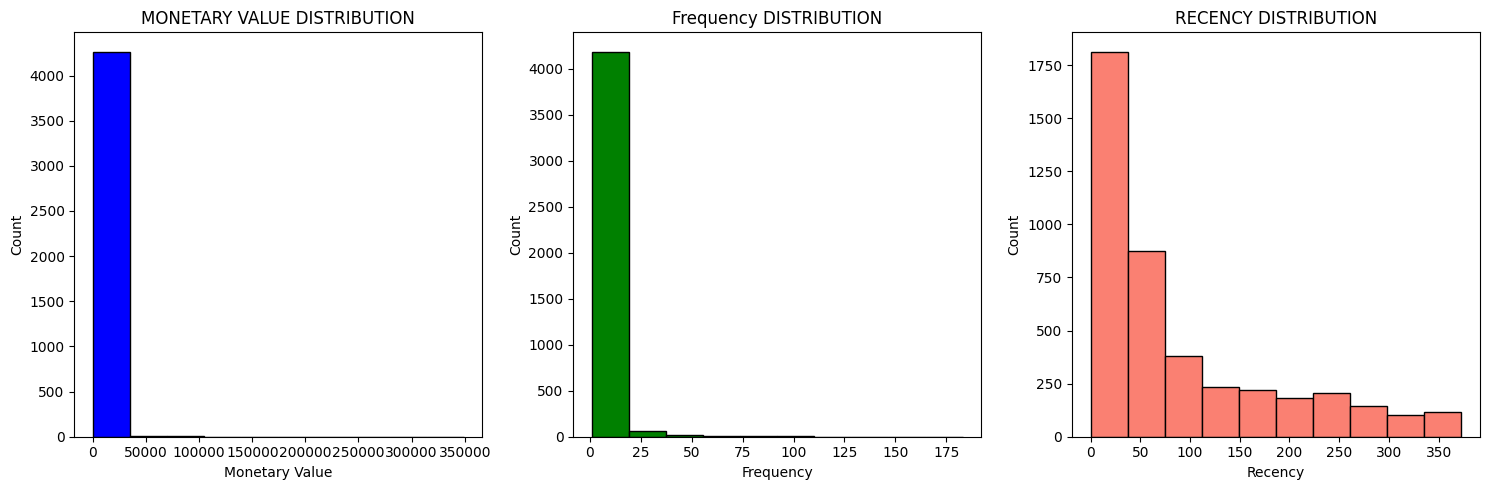

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"], bins=10, color='blue', edgecolor='black')
plt.title('MONETARY VALUE DISTRIBUTION')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"], bins=10, color='green', edgecolor='black')
plt.title('Frequency DISTRIBUTION')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins=10, color='salmon', edgecolor='black')
plt.title('RECENCY DISTRIBUTION')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

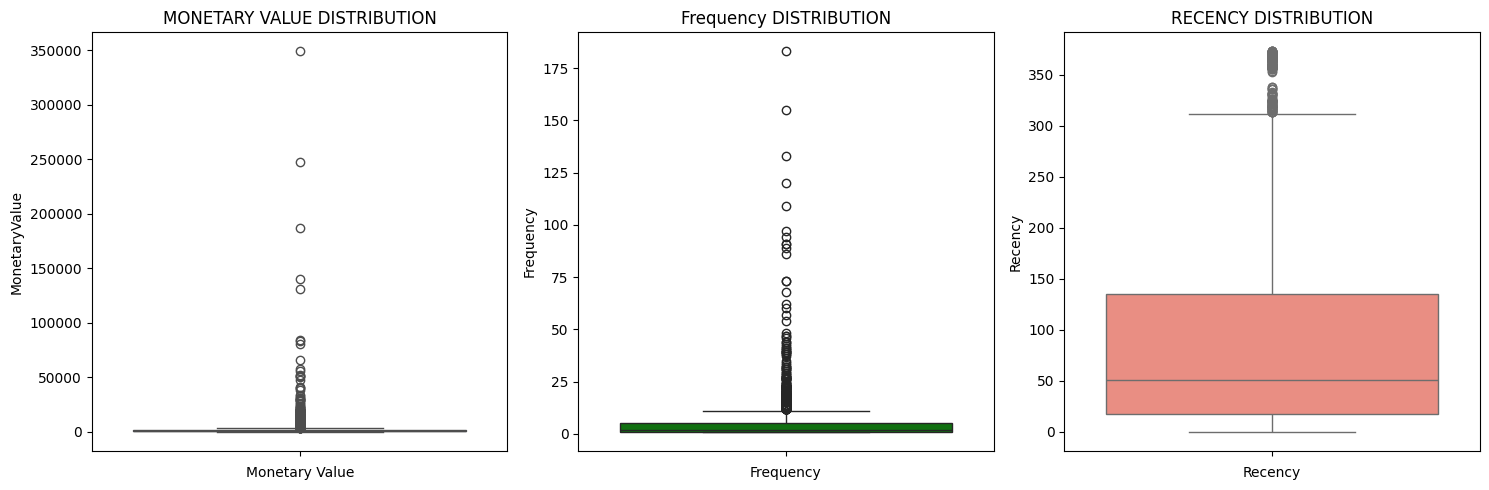

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["MonetaryValue"], color='blue')
plt.title('MONETARY VALUE DISTRIBUTION')
plt.xlabel('Monetary Value')


plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["Frequency"], color='green')
plt.title('Frequency DISTRIBUTION')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df["Recency"], color='salmon')
plt.title('RECENCY DISTRIBUTION')
plt.xlabel('Recency')

plt.tight_layout()
plt.show

In [12]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3-M_Q1
M_IQR

1396.73

In [13]:

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 +1.5*M_IQR)) | (aggregated_df["MonetaryValue"]<(M_Q1-1.5*M_IQR))]
monetary_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.0,11229.99,1,2010-11-16 10:05:00,23
25,12380.0,4782.84,4,2010-08-31 14:54:00,100
42,12409.0,12346.62,4,2010-10-15 10:24:00,55
48,12415.0,19468.84,4,2010-11-29 15:07:00,10
61,12431.0,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4253,18251.0,21964.14,8,2010-09-20 13:26:00,80


In [14]:
M_Q1 = aggregated_df["Frequency"].quantile(0.25)
M_Q3 = aggregated_df["Frequency"].quantile(0.75)
M_IQR = M_Q3-M_Q1
frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"]> (M_Q3+1.5*M_IQR)) | (aggregated_df["Frequency"]<(M_Q1-1.5*M_IQR))]
frequency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12437.0,6834.99,20,2010-11-09 14:46:00,30
84,12471.0,17721.45,44,2010-11-30 14:35:00,9
85,12472.0,10426.48,13,2010-12-05 14:19:00,4
92,12482.0,21941.72,27,2010-05-12 16:51:00,211
115,12523.0,2330.38,12,2010-11-30 12:31:00,9
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14


In [15]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3862.000000,3862.000000,3862.000000,3862,3862.000000
mean,15384.601502,910.879417,3.030554,2010-09-04 11:39:34.458829824,96.066546
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13920.250000,283.432500,1.000000,2010-07-13 13:19:45,22.000000
50%,15398.000000,599.540000,2.000000,2010-10-13 14:43:30,57.000000
75%,16863.750000,1309.605000,4.000000,2010-11-17 16:55:45,149.000000
max,18287.000000,3788.210000,62.000000,2010-12-09 20:01:00,373.000000
std,1694.571757,843.664122,2.763134,NaN,97.885719


<function matplotlib.pyplot.show(close=None, block=None)>

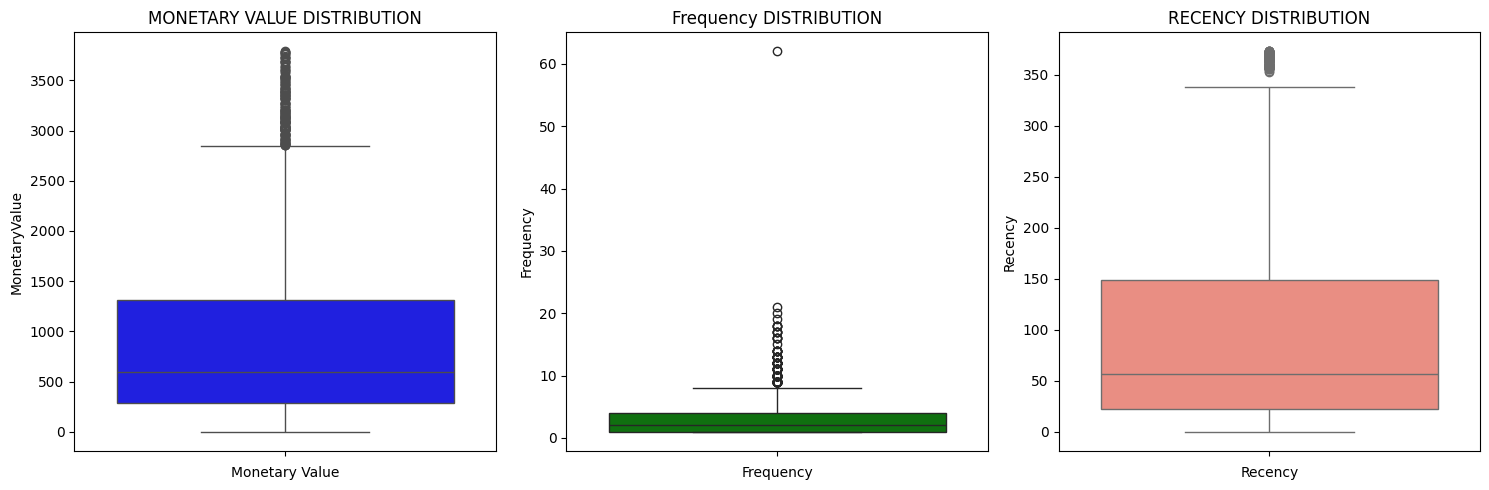

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df["MonetaryValue"], color='blue')
plt.title('MONETARY VALUE DISTRIBUTION')
plt.xlabel('Monetary Value')


plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["Frequency"], color='green')
plt.title('Frequency DISTRIBUTION')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df["Recency"], color='salmon')
plt.title('RECENCY DISTRIBUTION')
plt.xlabel('Recency')

plt.tight_layout()
plt.show

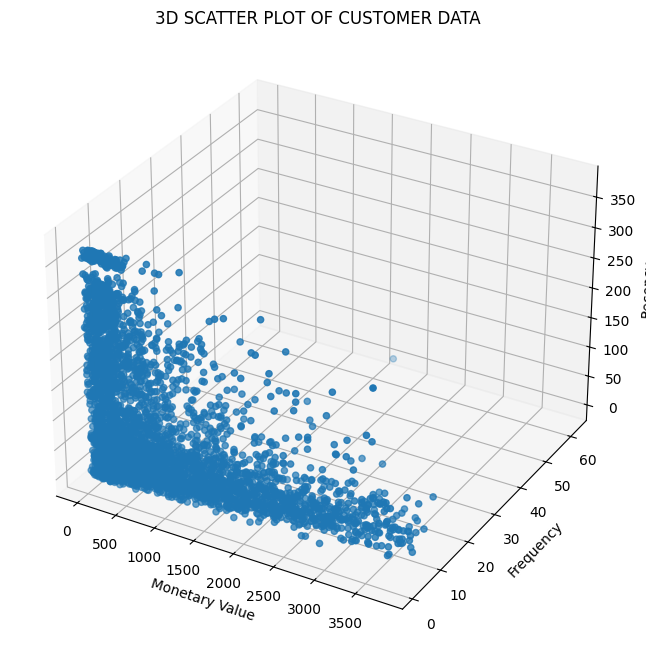

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D SCATTER PLOT OF CUSTOMER DATA')
plt.show()


In [18]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data


array([[-0.8790411 , -0.37301391,  0.69409768],
       [ 0.48893153, -0.37301391, -0.96110778],
       [-0.81763431, -0.73496861, -0.23567823],
       ...,
       [-0.63289233, -0.73496861,  2.0325663 ],
       [ 0.39778156, -0.37301391,  0.15257985],
       [ 1.64166031,  0.35089549, -0.80784802]])

In [19]:
scaled_data_df = pd.DataFrame(scaled_data,index = non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.879041,-0.373014,0.694098
1,0.488932,-0.373014,-0.961108
2,-0.817634,-0.734969,-0.235678
3,1.553261,-0.373014,-0.552415
4,-0.723070,-0.734969,-0.879369
...,...,...,...
4280,-0.319018,1.074805,-0.807848
4281,-0.591781,-0.734969,-0.307199
4282,-0.632892,-0.734969,2.032566
4283,0.397782,-0.373014,0.152580


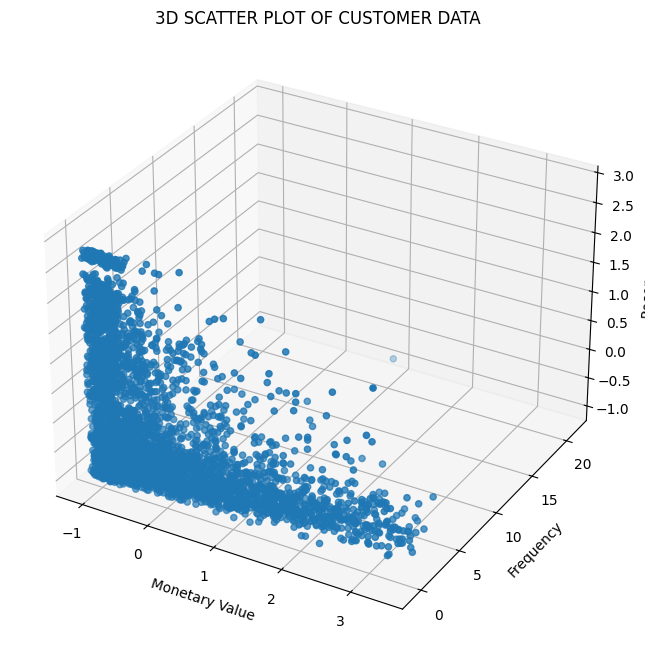

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D SCATTER PLOT OF CUSTOMER DATA')
plt.show()


KMeans Clustering and Silhouette

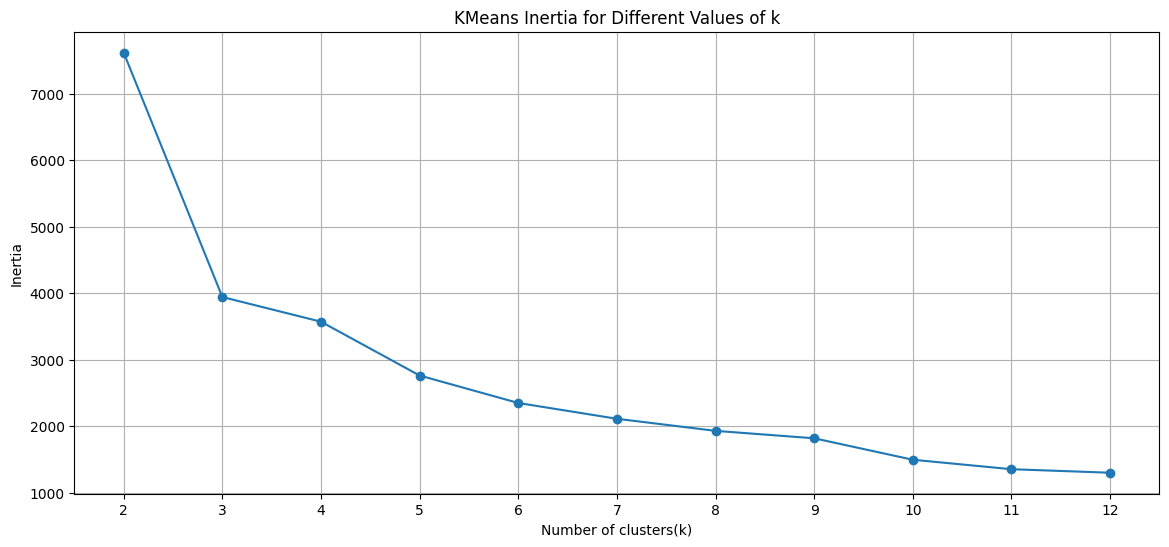

In [21]:
max_k = 12
inertia = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state =42, max_iter=1000)
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))  
plt.plot(k_values, inertia, marker='o') 
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

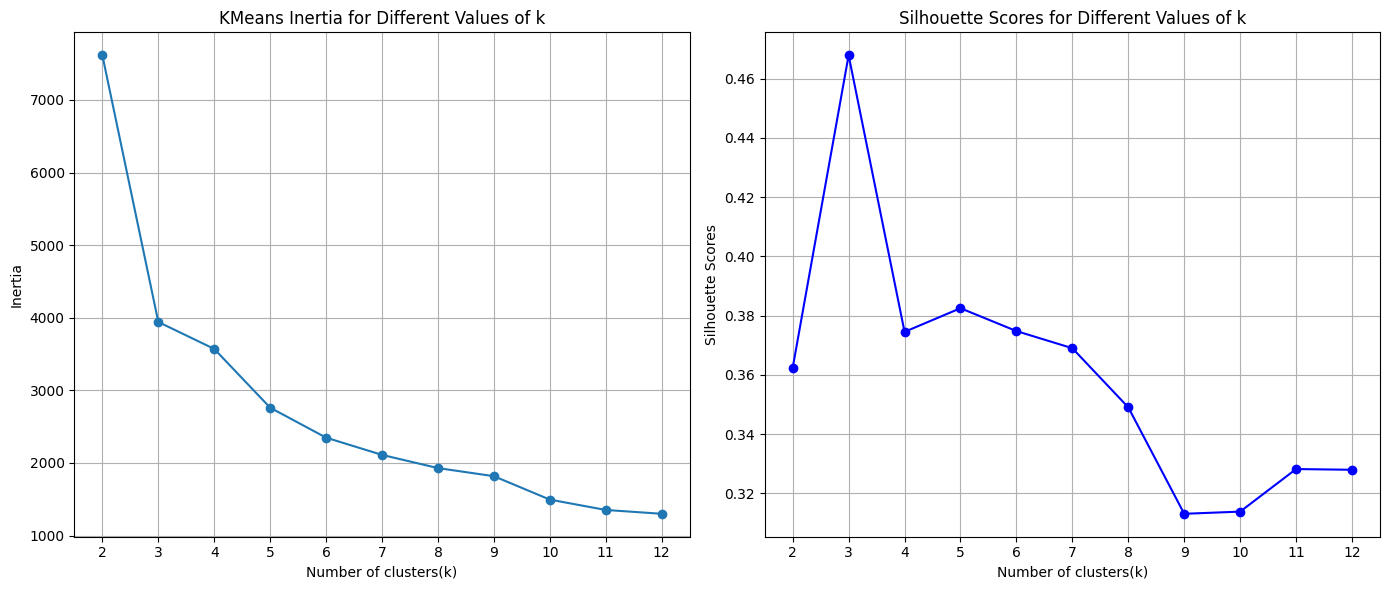

In [22]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state =42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)  
plt.plot(k_values, inertia, marker='o' ) 
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)  
plt.plot(k_values, silhouette_scores, marker='o',  color='blue') 
plt.title("Silhouette Scores for Different Values of k")
plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette Scores')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_data_df)
cluster_labels

array([3, 1, 1, ..., 0, 1, 2])

In [24]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df

C:\Users\hp\AppData\Local\Temp\ipykernel_2388\1071184375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.0,221.16,1,2010-09-27 14:59:00,73,1
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,2
4,12351.0,300.93,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,1
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,1
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,0
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,1


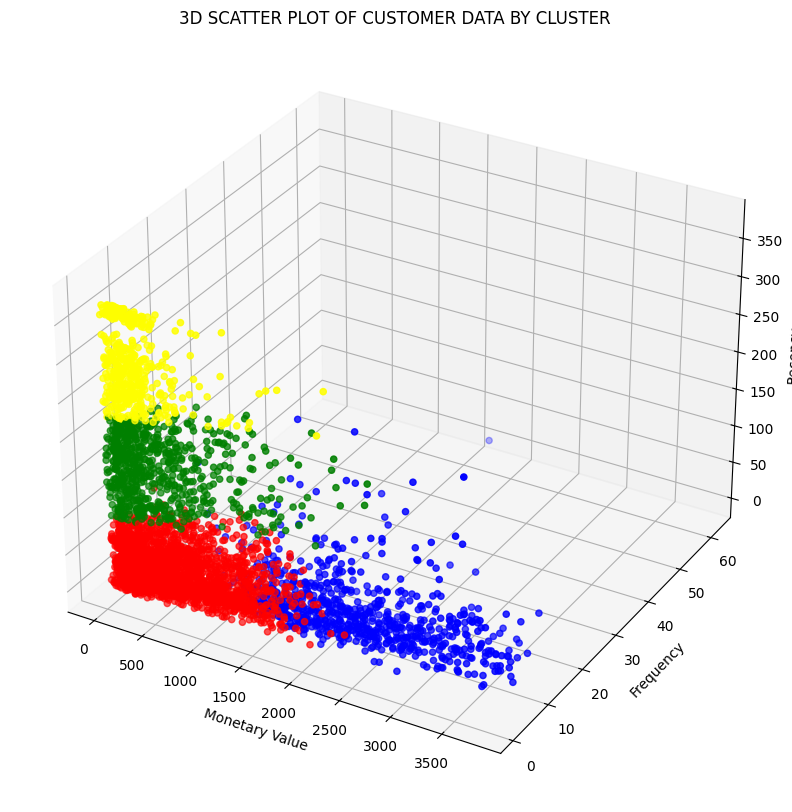

In [32]:
cluster_colors = {0: 'yellow',
                 1: 'red',
                 2: 'blue',
                 3: 'green'}

colors = non_outliers_df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c = colors, 
                     marker='o')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D SCATTER PLOT OF CUSTOMER DATA BY CLUSTER')
plt.show()


YELLOW indicate the number of customers that have high recency value, most customers have low frequency and some have high frequency, and low monetary value.
GREEN indicate the number of customer that have medium to low recency value, most customer have low frequency, some have high frequency and low monetary value.
RED indicates the number of customers that have very low recency value, low frequency amd low monetary value.
BLUE indicates the nunmber of customer with very low recency value, most customer have low frequency and some have vhigh frequency abd high monetary value.